In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
import joblib

In [2]:
df = pd.read_csv('mental_health.csv')

In [3]:
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [4]:
print(df.columns)

Index(['text', 'label'], dtype='object')


In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df.duplicated().sum()

5

In [7]:
df = df.dropna(subset=['text'])

df = df.reset_index(drop=True)

In [8]:
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [9]:
df = df.drop_duplicates()

df = df.reset_index(drop=True)

In [10]:
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27967,posting everyday people stop caring religion ...,0
27968,okay definetly need hear guys opinion ive pret...,0
27969,cant get dog think ill kill myselfthe last thi...,1
27970,whats point princess bridei really think like ...,1


In [11]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
X = df['text']  
y = df['label'] 

In [14]:
X

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27967    posting everyday people stop caring  religion ...
27968    okay definetly need hear guys opinion ive pret...
27969    cant get dog think ill kill myselfthe last thi...
27970    whats point princess bridei really think like ...
27971    got nudes person might might know snapchat do ...
Name: text, Length: 27972, dtype: object

In [15]:
y

0        0
1        1
2        0
3        1
4        1
        ..
27967    0
27968    0
27969    1
27970    1
27971    0
Name: label, Length: 27972, dtype: int64

In [16]:
class_counts = y.value_counts()
print(f"Class 0 sentiment count: {class_counts.get(0, 0)}")
print(f"Class 1 sentiment count: {class_counts.get(1, 0)}")

Class 0 sentiment count: 14134
Class 1 sentiment count: 13838


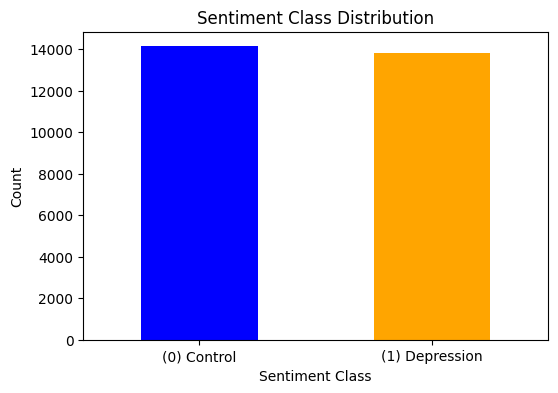

In [17]:
import matplotlib.pyplot as plt

class_counts = y.value_counts()

class_counts = class_counts.reindex([0, 1], fill_value=0)

plt.figure(figsize=(6, 4))  
class_counts.plot(kind='bar', color=['blue', 'orange'])  


plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')


plt.xticks(ticks=[0, 1], labels=['(0) Control', '(1) Depression'], rotation=0)


plt.show()


In [18]:
max_words = 10000  
max_sequence_length = 150 

In [19]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)  # Assuming X contains your text data
X_seq = tokenizer.texts_to_sequences(X)

In [20]:
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [22]:
model = Sequential()

In [23]:
model.add(Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length))

In [ ]:
model.add(GUR(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))))

In [25]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [26]:
model.add(Dense(len(np.unique(y)), activation='softmax'))

In [27]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
700/700 [==============================] - 774s 1s/step - loss: 0.3520 - accuracy: 0.8412
Epoch 2/10
700/700 [==============================] - 807s 1s/step - loss: 0.1851 - accuracy: 0.9314
Epoch 3/10
700/700 [==============================] - 798s 1s/step - loss: 0.1464 - accuracy: 0.9471
Epoch 4/10
700/700 [==============================] - 806s 1s/step - loss: 0.1248 - accuracy: 0.9558
Epoch 5/10
700/700 [==============================] - 769s 1s/step - loss: 0.1082 - accuracy: 0.9627
Epoch 6/10
700/700 [==============================] - 766s 1s/step - loss: 0.0937 - accuracy: 0.9689
Epoch 7/10
700/700 [==============================] - 762s 1s/step - loss: 0.0823 - accuracy: 0.9734
Epoch 8/10
700/700 [==============================] - 776s 1s/step - loss: 0.0745 - accuracy: 0.9751
Epoch 9/10
700/700 [==============================] - 968s 1s/step - loss: 0.0644 - accuracy: 0.9795
Epoch 10/10
700/700 [==============================] - 805s 1s/step - loss: 0.0582 - accura

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 300)          3000000   
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3472450 (13.25 MB)
Trainable params: 3472450 (13.25 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [30]:
model.save('LSTM_GRU_model.h5') 

joblib.dump(tokenizer, 'LSTM_GRU_tokenizer.pkl')


C:\Users\Python1\anaconda3\envs\Naveen\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['LSTM_GRU_tokenizer.pkl']

In [31]:
print("Model and tokenizer saved successfully!")

Model and tokenizer saved successfully!


In [32]:
print(f"Final Accuracy: {history.history['accuracy'][-1]:.4f}")

Final Accuracy: 0.9817


In [34]:
from keras.models import load_model
import joblib
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

# Load the saved LSTM model
model = load_model('LSTM_GRU_model.h5')

# Load the saved tokenizer
tokenizer = joblib.load('LSTM_GRU_tokenizer.pkl')

# Preprocess the input text for prediction
input_text = ["im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past  got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options"]
max_len = 150  # Must match the max_len used during training
print(input_text)

# Convert input text to sequences and pad them
input_seq = tokenizer.texts_to_sequences(input_text)
input_padded = pad_sequences(input_seq, maxlen=max_len)

# Make a prediction
prediction = model.predict(input_padded)

# Get the predicted class (0: No sarcastic, 1: Sarcastic)
predicted_class = np.argmax(prediction, axis=1)[0]

# Now we are using only the else block for sarcasm detection
# sarcasm_result = "Unknown"  # Default if not sarcastic or unknown class
if predicted_class == 0:
    sarcasm_result = "Control"
else:
    # In the else block, handle sarcasm
    sarcasm_result = "Depression"

# Print the result
print(f"Detection: {sarcasm_result}")


['im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past  got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options']


ValueError: in user code:

    File "C:\Users\Python1\anaconda3\envs\Naveen\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Python1\anaconda3\envs\Naveen\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Python1\anaconda3\envs\Naveen\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Python1\anaconda3\envs\Naveen\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\Python1\anaconda3\envs\Naveen\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Python1\anaconda3\envs\Naveen\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 150), found shape=(None, 100)
